<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
        <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
    </div>
</div>
<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">M2.876 · Análisis de grafos y redes sociales</p>
    <p style="margin: 0; text-align:right;">Máster universitario en Ciencias de datos (<i>Data science</i>)</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicaciones</p>
</div>
<div style="width: 100%; clear: both;"></div>
<div style="width:100%;">&nbsp;</div>

# Redes complejas

En este _notebook_ revisaremos y aplicaremos los conocimientos relacionados con la carga y creación de una red multicapa.

## Carga de librerías

Empezaremos importando las librerías necesarias para este ejemplo.

In [1]:
# Librerías básicas
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline

Las versiones de librerías que se deben emplear en esta actividad son las siguientes:
- NetworkX ver. 2.8.6
- Numpy ver. 1.23.3

In [2]:
# Comprovar las versiones
print("NetworkX ver. {}".format(nx.__version__))
print("Numpy    ver. {}".format(np.__version__))

NetworkX ver. 2.8.4
Numpy    ver. 1.21.5


## 1. Carga del conjunto de datos

En esta actividad vamos a trabajar con un conjunto de datos que provienen de dos redes diferentes. Este conjunto de datos, que se encuentra disponible en la carpeta `data` adjunta está formado por los siguientes ficheros:

- `layer1.edgelist`: contiene todas las aristas y sus respectivos pesos del layer 1 de nuestra red. 
- `layer2.edgelist`: contiene todas las aristas y sus respectivos pesos del layer 2 de nuestra red. 

### 1.1. Importación de los datos y creación del grafo

Usando los dos layers proporcionados, correspondientes a una red multiplex, construiremos un grafo **simétrico** (no dirigido) y **ponderado**. 

En caso que una arista se encuentre en ambos layers, su peso asociado será la suma de los pesos de cada layer. 

Empleamos la función `read_edgelist` de la librería `NetworkX` para implementar la lectura y carga de las capas (_layers_) y generación de la red.

EL formato de los ficheros de entrada es el siguiente:
- 0 1 {'weight': 0.3}
- 0 2 {'weight': 0.4}
- 0 3 {'weight': 0.2}

Es decir, línea del fichero de entrada representa un arista en el siguiente formato: 
- `nodo origen` `nodo destino` {'weight': `peso arista`}

In [3]:
file_layer1 = "data/layer1.edgelist"
file_layer2 = "data/layer2.edgelist"

F1 = nx.read_edgelist(file_layer1)
F2 = nx.read_edgelist(file_layer2)

print('layer1: num nodes {}, num edges {}'.format(nx.number_of_nodes(F1),nx.number_of_edges(F1)))
print('layer2: num nodes {}, num edges {}'.format(nx.number_of_nodes(F2),nx.number_of_edges(F2)))

layer1: num nodes 100, num edges 930
layer2: num nodes 98, num edges 260


In [4]:
print('nodes intersection: {}'.format(len(set(F1.nodes()).intersection(set(F2.nodes())))))
print('edges intersection: {}'.format(len(set(F1.edges()).intersection(set(F2.edges())))))

nodes intersection: 78
edges intersection: 0


Podemos observar que el número de nodos no es el mismo en ambas redes, y que el número de aristas difiere sensiblemente.

A partir de los datos de ambas capas, crearemos la red multiplex en el siguiente código:

In [5]:
# join network
edg1 = [(a,b,c['weight']) for a,b,c in F1.edges(data=True)]
edg2 = [(a,b,c['weight']) for a,b,c in F2.edges(data=True)]

G = nx.Graph()
G.add_weighted_edges_from(edg1)
G.add_weighted_edges_from(edg2)

print('G: num nodes {}, num edges {}'.format(nx.number_of_nodes(G),nx.number_of_edges(G)))

G: num nodes 120, num edges 1190


### 1.2. Visualización de la red

A continuación, veremos una posible representación gráfica de la red multiplex empleando la librería `networkX`.

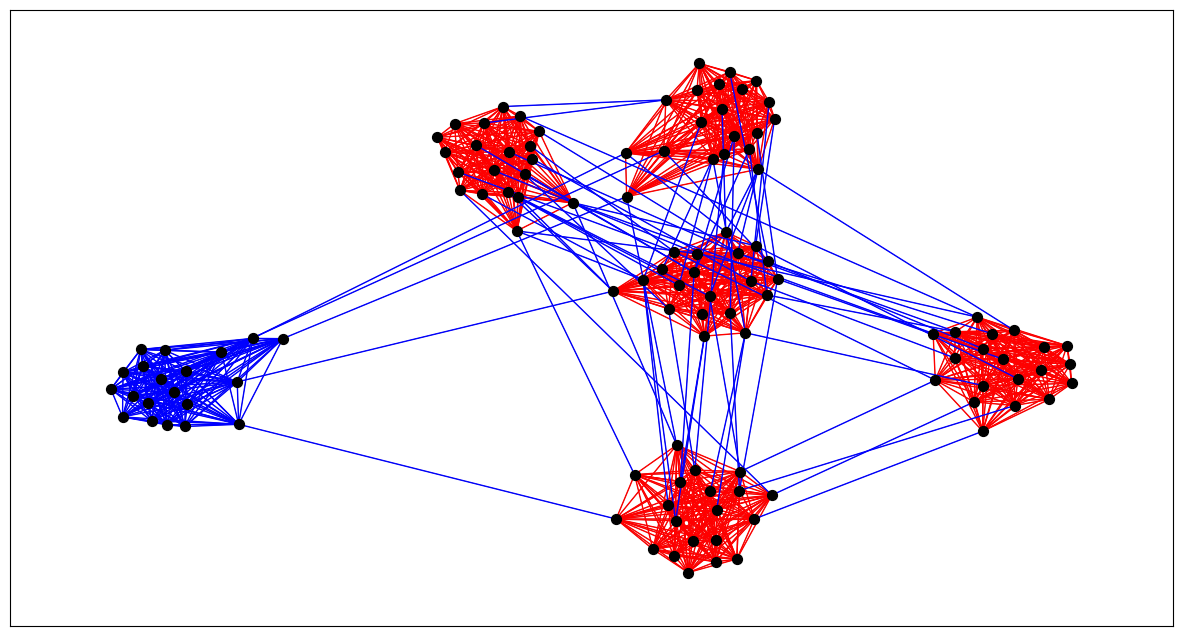

In [6]:
# Representar el grafo mostrando layers.
pos = nx.spring_layout(G)

plt.figure(1,figsize=(15,8)) 
nx.draw_networkx(G, pos, with_labels=False, node_size=50, width=0.3, node_color='k')

nx.draw_networkx_edges(G, pos, edgelist=F1.edges(), edge_color='r')
nx.draw_networkx_edges(G, pos, edgelist=F2.edges(), edge_color='b')

Cada capa está indicada con un color diferentes:
- **Rojo** para la capa 1
- **Azul** para la capa 2

## 1.2. Cálculo de las métricas básicas

En esta sección, calcularemos algunas de las principales métricas sobre la red multiplex. 

En concreto, calcularemos:
- la secuencia de grados
- el _clustering coefficient_ 
- la distribución de pesos

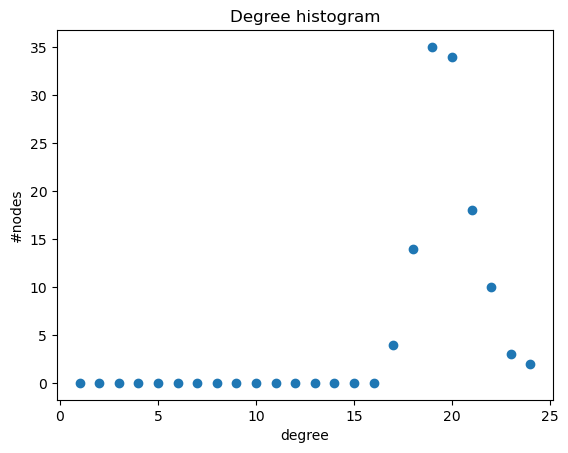

In [7]:
# Secuencia de grados
deg_hist = nx.degree_histogram(G)

plt.figure()
plt.scatter(x=range(1,len(deg_hist)), y=deg_hist[1:])
plt.title("Degree histogram")
plt.ylabel("#nodes")
plt.xlabel("degree");

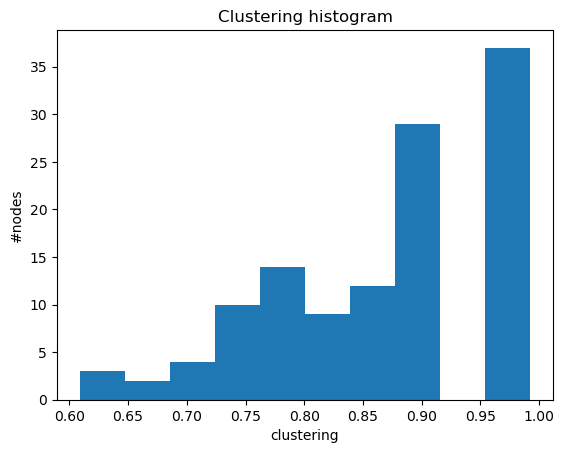

In [8]:
# Clustering
cc = nx.clustering(G)
sorted_clustering = {k: v for k, v in sorted(cc.items(), key=lambda item: item[1],reverse=True)}

plt.hist(sorted_clustering.values(),bins=10)
plt.title("Clustering histogram")
plt.ylabel("#nodes")
plt.xlabel("clustering");

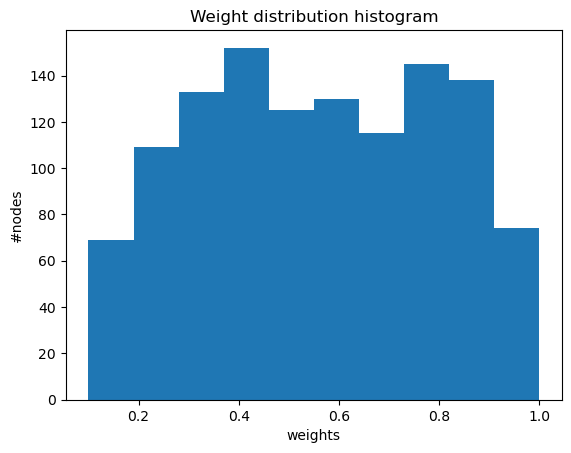

In [9]:
# Weight distribution
weights = sorted(c['weight'] for a,b,c in G.edges(data=True))

plt.hist(weights,bins=10)
plt.title("Weight distribution histogram")
plt.ylabel("#nodes")
plt.xlabel("weights");